# [미세먼지 경향분석 및 딥러닝 기반 예측](http://data.daegu.go.kr/open/main.do)
빅데이터 인턴으로 있을 때 수행한 기상청 미세먼지 예측 프로젝트입니다  
미세먼지 경향분석과 시계열 예측이 아닌 딥러닝 예측은 처음으로 적용했는데 정확성이 높게 나왔습니다

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DongChanKIM2/fine-dust-forecasting-by-deeplearning/blob/main/**fine-dust-forecasting-by-deeplearning**.ipynb)

## 필요한 라이브러리 불어오기

In [ ]:
import pandas as pd # 데이터
import matplotlib.pyplot as plt
import seaborn as sns # 시각화
import numpy as np # 수학연산

In [ ]:
data=pd.read_csv('sample.csv')
data

,시간,온도,풍향,풍속,일사량,습도,미세먼지
0,2017-01-01 01시,1.6,북서,1.2,0,83.4,30
1,2017-01-01 02시,1.2,서북서,1,0,84.7,31
2,2017-01-01 03시,0.9,서,0.8,0,85.8,29
3,2017-01-01 04시,0.5,북서,1,0,89.1,27
4,2017-01-01 05시,0,서북서,0.8,0,88.6,29
...,...,...,...,...,...,...,...
16053,2018-10-31 22시,10.6,서,1.7,0,43.7,교정
16054,2018-10-31 23시,9.8,서남서,1.6,0,47.3,교정
16055,2018-10-31 24시,9.1,서남서,1.9,0,51.1,교정
16056,2018-11-01 01시,8.5,남서,2.1,0,55.1,교정


In [ ]:
data.shape

(16058, 7)

In [ ]:
data.isnull().sum()

시간      0
온도      0
풍향      0
풍속      0
일사량     0
습도      0
미세먼지    0
dtype: int64

## 이상치 제거

In [ ]:
indexNames = data[(data['온도'] == '교정') | (data['온도'] == '동불') | (data['온도'] == '보수')].index
data.drop(indexNames, inplace=True)
data

,시간,온도,풍향,풍속,일사량,습도,미세먼지
0,2017-01-01 01시,1.6,북서,1.2,0,83.4,30
1,2017-01-01 02시,1.2,서북서,1,0,84.7,31
2,2017-01-01 03시,0.9,서,0.8,0,85.8,29
3,2017-01-01 04시,0.5,북서,1,0,89.1,27
4,2017-01-01 05시,0,서북서,0.8,0,88.6,29
...,...,...,...,...,...,...,...
16053,2018-10-31 22시,10.6,서,1.7,0,43.7,교정
16054,2018-10-31 23시,9.8,서남서,1.6,0,47.3,교정
16055,2018-10-31 24시,9.1,서남서,1.9,0,51.1,교정
16056,2018-11-01 01시,8.5,남서,2.1,0,55.1,교정


In [ ]:
indexNames = data[(data['일사량'] == '교정') | (data['일사량'] == '동불') | (data['일사량'] == '보수')].index
data.drop(indexNames, inplace=True)
data

,시간,온도,풍향,풍속,일사량,습도,미세먼지
0,2017-01-01 01시,1.6,북서,1.2,0,83.4,30
1,2017-01-01 02시,1.2,서북서,1,0,84.7,31
2,2017-01-01 03시,0.9,서,0.8,0,85.8,29
3,2017-01-01 04시,0.5,북서,1,0,89.1,27
4,2017-01-01 05시,0,서북서,0.8,0,88.6,29
...,...,...,...,...,...,...,...
16053,2018-10-31 22시,10.6,서,1.7,0,43.7,교정
16054,2018-10-31 23시,9.8,서남서,1.6,0,47.3,교정
16055,2018-10-31 24시,9.1,서남서,1.9,0,51.1,교정
16056,2018-11-01 01시,8.5,남서,2.1,0,55.1,교정


In [ ]:
indexNames = data[(data['온도'] == '교정') | (data['온도'] == '동불') | (data['온도'] == '보수')].index
data.drop(indexNames, inplace=True)
data

,시간,온도,풍향,풍속,일사량,습도,미세먼지
0,2017-01-01 01시,1.6,북서,1.2,0,83.4,30
1,2017-01-01 02시,1.2,서북서,1,0,84.7,31
2,2017-01-01 03시,0.9,서,0.8,0,85.8,29
3,2017-01-01 04시,0.5,북서,1,0,89.1,27
4,2017-01-01 05시,0,서북서,0.8,0,88.6,29
...,...,...,...,...,...,...,...
16053,2018-10-31 22시,10.6,서,1.7,0,43.7,교정
16054,2018-10-31 23시,9.8,서남서,1.6,0,47.3,교정
16055,2018-10-31 24시,9.1,서남서,1.9,0,51.1,교정
16056,2018-11-01 01시,8.5,남서,2.1,0,55.1,교정


In [ ]:
indexNames = data[(data['미세먼지'] == '교정') | (data['미세먼지'] == '동불') | (data['미세먼지'] == '보수')| (data['미세먼지'] == '이상')].index
data.drop(indexNames, inplace=True)
data

,시간,온도,풍향,풍속,일사량,습도,미세먼지
0,2017-01-01 01시,1.6,북서,1.2,0,83.4,30
1,2017-01-01 02시,1.2,서북서,1,0,84.7,31
2,2017-01-01 03시,0.9,서,0.8,0,85.8,29
3,2017-01-01 04시,0.5,북서,1,0,89.1,27
4,2017-01-01 05시,0,서북서,0.8,0,88.6,29
...,...,...,...,...,...,...,...
16013,2018-10-30 06시,6.6,북북서,2.6,0,66.1,10
16014,2018-10-30 07시,6.2,북서,2.2,4,65.5,11
16015,2018-10-30 08시,6.4,서북서,2.4,84,59.5,11
16016,2018-10-30 09시,7.3,서북서,3.1,257,50.9,12


## One hot encoding

In [ ]:
data['풍향']=data['풍향'].map({'남':0, '남남동':1, '남남서':2, '남동':3, '남서':4, 
                           '동':5, '동남동':6,'동북동':7,
                           '북':8,'북동':9,'북북동':10,'북북서':11,'북서':12,
                          '서':13,'서남서':14,'서북서':15})

In [ ]:
data.온도=data.온도.astype("float")
data.일사량=data.일사량.astype("float")
data.습도=data.습도.astype("float")
data.미세먼지=data.미세먼지.astype("float")
data.풍속=data.풍속.astype("float")
data=data.drop('시간',axis=1)

## Column명 변경

In [ ]:
data.columns = [' temp', 'dir', 'speed','sunlight','mist','dust']

In [ ]:
data.head()

,temp,dir,speed,sunlight,mist,dust
0,1.6,12,1.2,0.0,83.4,30.0
1,1.2,15,1.0,0.0,84.7,31.0
2,0.9,13,0.8,0.0,85.8,29.0
3,0.5,12,1.0,0.0,89.1,27.0
4,0.0,15,0.8,0.0,88.6,29.0


histogram을 통해 dust와 가장 유사한 plot이 speed임을 알고 있고 상관관계가 있음을 알 수 있음

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018558A9A250>,
      dtype=object)

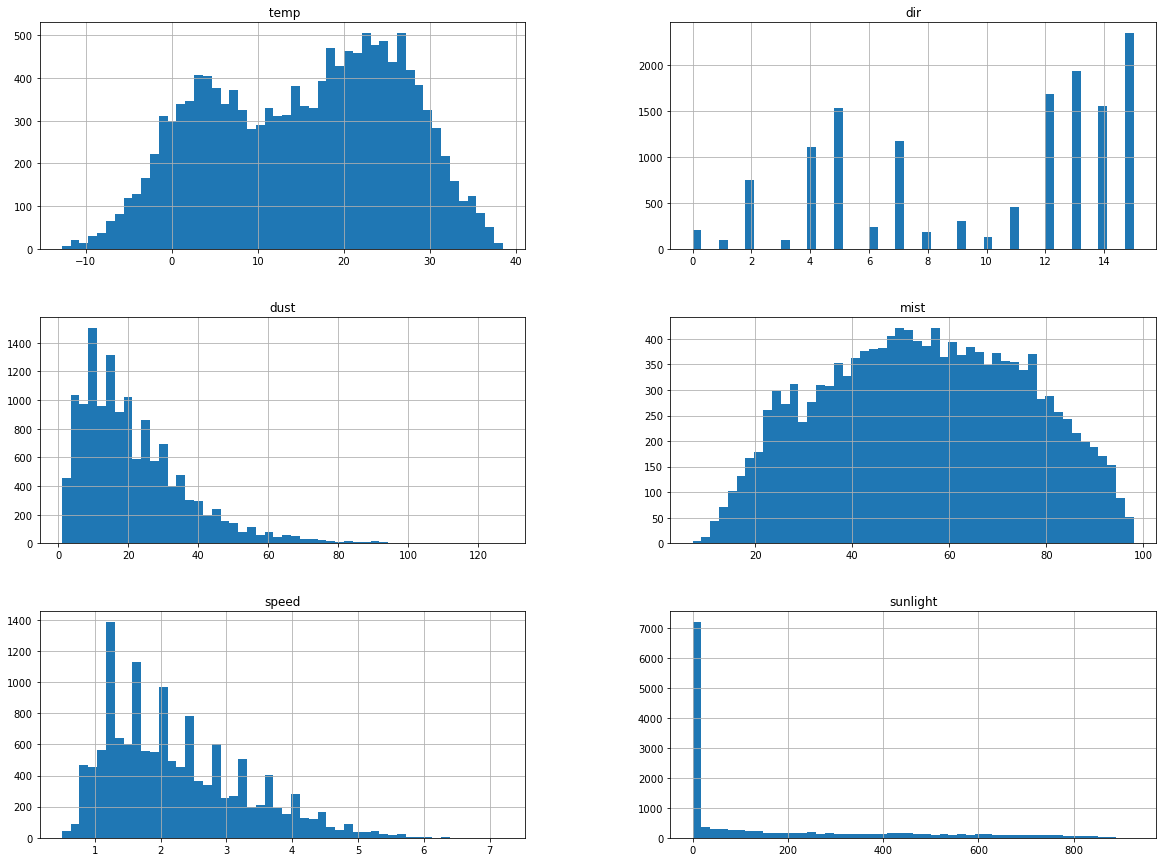

In [ ]:
#bins 막대 세분화 면적
data.hist(bins=50, figsize=(20,15))

## Dust와 Speed의 상관관계를 Plot에서 확인

## 상관계수

In [ ]:
corr = data.corr()

In [ ]:
corr['dust'].sort_values(ascending=False)

dust        1.000000
dir         0.058014
sunlight    0.027568
mist       -0.044335
 temp      -0.163861
speed      -0.360485
Name: dust, dtype: float64

위의 그림에서 예측한 바와 같이 speed와 dust의 상관관계가 가장 큼

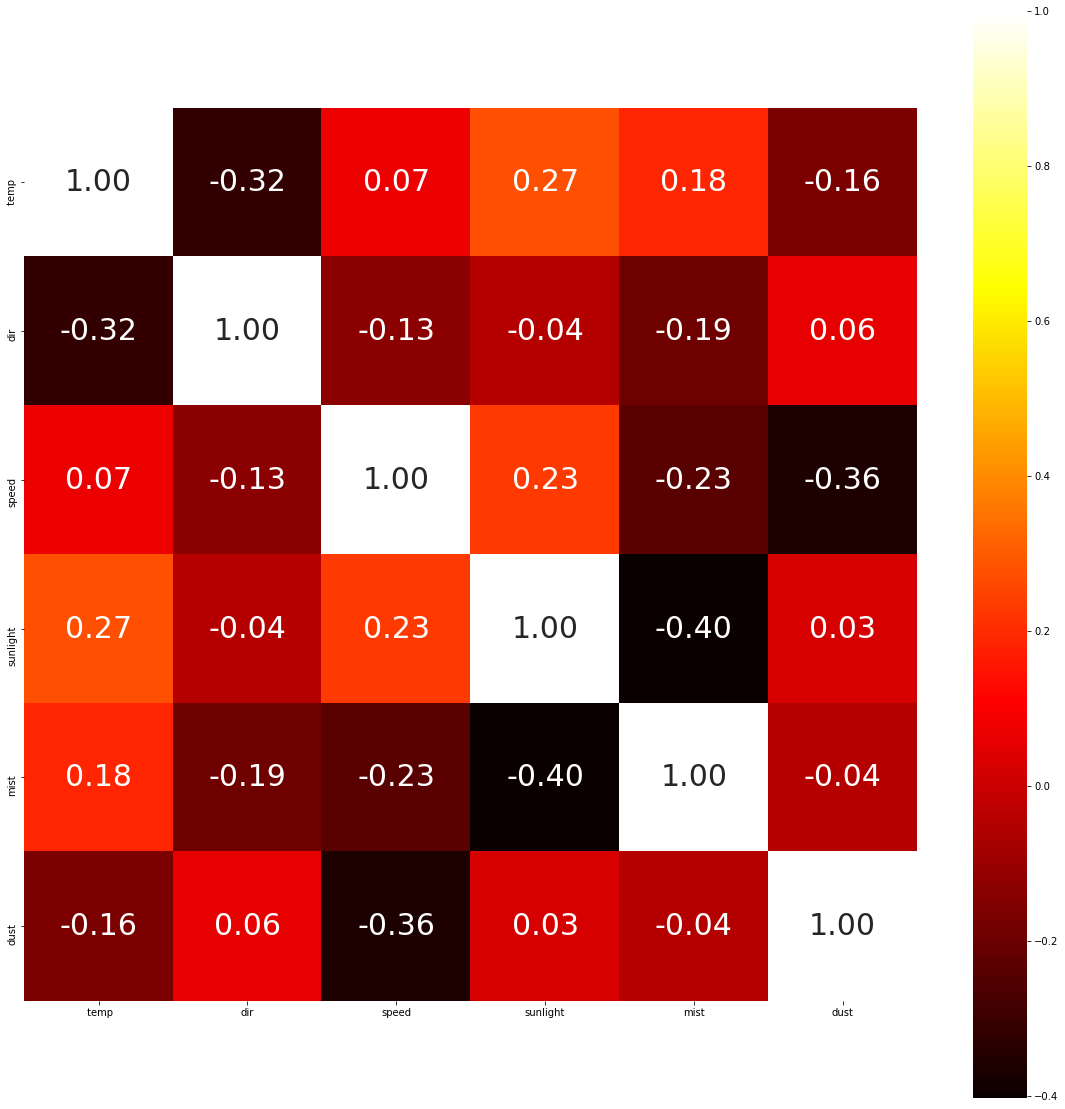

In [ ]:
plt.figure(figsize=(20,20))
df_heatmap=sns.heatmap(corr, cbar=True, annot=True, annot_kws={'size':30}, fmt='.2f',square=True, cmap='hot')

In [ ]:
y_data=data.dust
y_data.columns=['dust']
y_data=y_data

In [ ]:
data=data.drop('dust',axis=1)
x_data=data
x_data

,temp,dir,speed,sunlight,mist
0,1.6,12,1.2,0.0,83.4
1,1.2,15,1.0,0.0,84.7
2,0.9,13,0.8,0.0,85.8
3,0.5,12,1.0,0.0,89.1
4,0.0,15,0.8,0.0,88.6
...,...,...,...,...,...
16013,6.6,11,2.6,0.0,66.1
16014,6.2,12,2.2,4.0,65.5
16015,6.4,15,2.4,84.0,59.5
16016,7.3,15,3.1,257.0,50.9


## 딥러닝(LSTM)을 통한 시계열 예측

In [ ]:
from numpy import array # 수학연산 배열
from numpy import hstack # 수학연산 stack

%config lnlineBackend.figure_format = 'retina'

from keras.models import Sequential # keras 시계열
from keras.layers import Dense, LSTM # keras LSTM Model

In [ ]:
y_data

0        30.0
1        31.0
2        29.0
3        27.0
4        29.0
         ... 
16013    10.0
16014    11.0
16015    11.0
16016    12.0
16017     8.0
Name: dust, Length: 13779, dtype: float64

## 결과값 Array로 변경

In [ ]:
train=array(y_data)
train.shape
train
#test
#train

array([30., 31., 29., ..., 11., 12.,  8.])

In [ ]:
#np.random.seed(777)

In [ ]:
#LSTM 입력에 대해 출력을 맵핑
#시계열 예측을 위한 다층퍼셉트론 모델 제작
#제작한 Array를 5개씩 묶어서 하나의 결과값으로 새로운 Array에 append

steps=5
features=1
def split_sequence(sequence, steps):
    X, y = list(), list()
    for i in range(len(sequence)):
        end_index = i + steps
        if end_index > len(sequence)-1:
            break
        seq_x,seq_y = sequence[i:end_index],sequence[end_index]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [ ]:
#13779개의 데이터가 5개씩 끊어서 맵핑을 한 결과 13774개로 감소
train_train, train_test = split_sequence(train, steps)
print(train_train.shape, train_test.shape)

(13774, 5) (13774,)


In [ ]:
#데이터가 5개씩 묶인 것 확인
train_train

array([[30., 31., 29., 27., 29.],
       [31., 29., 27., 29., 30.],
       [29., 27., 29., 30., 31.],
       ...,
       [10.,  7.,  7., 10., 11.],
       [ 7.,  7., 10., 11., 11.],
       [ 7., 10., 11., 11., 12.]])

In [ ]:
train_test

array([30., 31., 36., ..., 11., 12.,  8.])

In [ ]:
#reshpae을 통한 배열 재구조
train_train = train_train.reshape((train_train.shape[0], train_train.shape[1], features))

In [ ]:
train_train

array([[[30.],
        [31.],
        [29.],
        [27.],
        [29.]],

       [[31.],
        [29.],
        [27.],
        [29.],
        [30.]],

       [[29.],
        [27.],
        [29.],
        [30.],
        [31.]],

       ...,

       [[10.],
        [ 7.],
        [ 7.],
        [10.],
        [11.]],

       [[ 7.],
        [ 7.],
        [10.],
        [11.],
        [11.]],

       [[ 7.],
        [10.],
        [11.],
        [11.],
        [12.]]])

In [ ]:
model=Sequential()
model.add(LSTM(300, activation='relu', return_sequences=True, input_shape=(steps,features)))
model.add(LSTM(300, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
histogram = model.fit(train_train, train_test, epochs=30, batch_size=100, verbose=1)

Epoch 1/30
138/138 [==============================] - 15s 105ms/step - loss: 69.9733
Epoch 2/30
138/138 [==============================] - 12s 90ms/step - loss: 26.8318
Epoch 3/30
138/138 [==============================] - 12s 88ms/step - loss: 26.2871
Epoch 4/30
138/138 [==============================] - 12s 89ms/step - loss: 26.2320
Epoch 5/30
138/138 [==============================] - 12s 85ms/step - loss: 25.4379
Epoch 6/30
138/138 [==============================] - 13s 91ms/step - loss: 25.6124
Epoch 7/30
138/138 [==============================] - 12s 88ms/step - loss: 26.2902
Epoch 8/30
138/138 [==============================] - 12s 86ms/step - loss: 25.4682
Epoch 9/30
138/138 [==============================] - 12s 90ms/step - loss: 25.3891
Epoch 10/30
138/138 [==============================] - 13s 95ms/step - loss: 25.9797
Epoch 11/30
138/138 [==============================] - 13s 91ms/step - loss: 25.6720
Epoch 12/30
138/138 [==============================] - 13s 93ms/step - lo

In [ ]:
test=pd.read_csv('test.csv')
test

,시간,온도,풍향,풍속,일사량,습도,미세먼지
0,2018-11-01 03시,7.5,서,1.4,0,60.9,34
1,2018-11-01 04시,6.6,서북서,1.5,0,69,44
2,2018-11-01 05시,5.9,북서,1.3,0,74.7,55
3,2018-11-01 06시,5,북서,1.6,0,76.7,43
4,2018-11-01 07시,4.5,북서,1.4,4,79,48
...,...,...,...,...,...,...,...
7289,2019-08-31 20시,26.8,북서,1.9,0,49.7,14
7290,2019-08-31 21시,26.1,동북동,1.4,0,53.7,17
7291,2019-08-31 22시,24.9,동남동,1.5,0,59.1,23
7292,2019-08-31 23시,24.4,동,1.4,0,60.6,21


In [ ]:
test.isnull().sum()

시간      0
온도      0
풍향      0
풍속      0
일사량     0
습도      0
미세먼지    0
dtype: int64

In [ ]:
indexNames = test[(test['온도'] == '교정') | (test['온도'] == '동불') | (test['온도'] == '보수')].index
test.drop(indexNames, inplace=True)
test

,시간,온도,풍향,풍속,일사량,습도,미세먼지
0,2018-11-01 03시,7.5,서,1.4,0,60.9,34
1,2018-11-01 04시,6.6,서북서,1.5,0,69,44
2,2018-11-01 05시,5.9,북서,1.3,0,74.7,55
3,2018-11-01 06시,5,북서,1.6,0,76.7,43
4,2018-11-01 07시,4.5,북서,1.4,4,79,48
...,...,...,...,...,...,...,...
7289,2019-08-31 20시,26.8,북서,1.9,0,49.7,14
7290,2019-08-31 21시,26.1,동북동,1.4,0,53.7,17
7291,2019-08-31 22시,24.9,동남동,1.5,0,59.1,23
7292,2019-08-31 23시,24.4,동,1.4,0,60.6,21


In [ ]:
indexNames = test[(test['일사량'] == '교정') | (test['일사량'] == '동불') | (test['일사량'] == '보수')].index
test.drop(indexNames, inplace=True)
test

,시간,온도,풍향,풍속,일사량,습도,미세먼지
0,2018-11-01 03시,7.5,서,1.4,0,60.9,34
1,2018-11-01 04시,6.6,서북서,1.5,0,69,44
2,2018-11-01 05시,5.9,북서,1.3,0,74.7,55
3,2018-11-01 06시,5,북서,1.6,0,76.7,43
4,2018-11-01 07시,4.5,북서,1.4,4,79,48
...,...,...,...,...,...,...,...
7289,2019-08-31 20시,26.8,북서,1.9,0,49.7,14
7290,2019-08-31 21시,26.1,동북동,1.4,0,53.7,17
7291,2019-08-31 22시,24.9,동남동,1.5,0,59.1,23
7292,2019-08-31 23시,24.4,동,1.4,0,60.6,21


In [ ]:
indexNames = test[(test['온도'] == '교정') | (test['온도'] == '동불') | (test['온도'] == '보수')].index
test.drop(indexNames, inplace=True)
test

,시간,온도,풍향,풍속,일사량,습도,미세먼지
0,2018-11-01 03시,7.5,서,1.4,0,60.9,34
1,2018-11-01 04시,6.6,서북서,1.5,0,69,44
2,2018-11-01 05시,5.9,북서,1.3,0,74.7,55
3,2018-11-01 06시,5,북서,1.6,0,76.7,43
4,2018-11-01 07시,4.5,북서,1.4,4,79,48
...,...,...,...,...,...,...,...
7289,2019-08-31 20시,26.8,북서,1.9,0,49.7,14
7290,2019-08-31 21시,26.1,동북동,1.4,0,53.7,17
7291,2019-08-31 22시,24.9,동남동,1.5,0,59.1,23
7292,2019-08-31 23시,24.4,동,1.4,0,60.6,21


In [ ]:
indexNames = test[(test['미세먼지'] == '교정') | (test['미세먼지'] == '동불') | (test['미세먼지'] == '보수')| (test['미세먼지'] == '이상')].index
test.drop(indexNames, inplace=True)
test

,시간,온도,풍향,풍속,일사량,습도,미세먼지
0,2018-11-01 03시,7.5,서,1.4,0,60.9,34
1,2018-11-01 04시,6.6,서북서,1.5,0,69,44
2,2018-11-01 05시,5.9,북서,1.3,0,74.7,55
3,2018-11-01 06시,5,북서,1.6,0,76.7,43
4,2018-11-01 07시,4.5,북서,1.4,4,79,48
...,...,...,...,...,...,...,...
7289,2019-08-31 20시,26.8,북서,1.9,0,49.7,14
7290,2019-08-31 21시,26.1,동북동,1.4,0,53.7,17
7291,2019-08-31 22시,24.9,동남동,1.5,0,59.1,23
7292,2019-08-31 23시,24.4,동,1.4,0,60.6,21


In [ ]:
test['풍향']=test['풍향'].map({'남':0, '남남동':1, '남남서':2, '남동':3, '남서':4, 
                           '동':5, '동남동':6,'동북동':7,
                           '북':8,'북동':9,'북북동':10,'북북서':11,'북서':12,
                          '서':13,'서남서':14,'서북서':15})

In [ ]:
test.온도=test.온도.astype("float")
test.일사량=test.일사량.astype("float")
test.습도=test.습도.astype("float")
test.미세먼지=test.미세먼지.astype("float")
test.풍속=test.풍속.astype("float")
test=test.drop('시간',axis=1)

In [ ]:
test.columns = [' temp', 'dir', 'speed','sunlight','mist','dust']

In [ ]:
test

,temp,dir,speed,sunlight,mist,dust
0,7.5,13,1.4,0.0,60.9,34.0
1,6.6,15,1.5,0.0,69.0,44.0
2,5.9,12,1.3,0.0,74.7,55.0
3,5.0,12,1.6,0.0,76.7,43.0
4,4.5,12,1.4,4.0,79.0,48.0
...,...,...,...,...,...,...
7289,26.8,12,1.9,0.0,49.7,14.0
7290,26.1,7,1.4,0.0,53.7,17.0
7291,24.9,6,1.5,0.0,59.1,23.0
7292,24.4,5,1.4,0.0,60.6,21.0


In [ ]:
y_test=test.dust
y_test.columns=['dust']
y_test
#y_data=y_data

0       34.0
1       44.0
2       55.0
3       43.0
4       48.0
        ... 
7289    14.0
7290    17.0
7291    23.0
7292    21.0
7293    16.0
Name: dust, Length: 7189, dtype: float64

In [ ]:
test=test.drop('dust',axis=1)
test

,temp,dir,speed,sunlight,mist
0,7.5,13,1.4,0.0,60.9
1,6.6,15,1.5,0.0,69.0
2,5.9,12,1.3,0.0,74.7
3,5.0,12,1.6,0.0,76.7
4,4.5,12,1.4,4.0,79.0
...,...,...,...,...,...
7289,26.8,12,1.9,0.0,49.7
7290,26.1,7,1.4,0.0,53.7
7291,24.9,6,1.5,0.0,59.1
7292,24.4,5,1.4,0.0,60.6


In [ ]:
test=array(y_test)
test.shape
test

array([34., 44., 55., ..., 23., 21., 16.])

In [ ]:
test_train, test_test = split_sequence(test, steps)
print(test_train.shape, test_test.shape)

(7184, 5) (7184,)


In [ ]:
test_train

array([[34., 44., 55., 43., 48.],
       [44., 55., 43., 48., 53.],
       [55., 43., 48., 53., 65.],
       ...,
       [16., 16., 15., 14., 17.],
       [16., 15., 14., 17., 23.],
       [15., 14., 17., 23., 21.]])

In [ ]:
test_test=array(test_test)
test_test

array([53., 65., 53., ..., 23., 21., 16.])

In [ ]:
test_train = test_train.reshape((test_train.shape[0], test_train.shape[1], features))

In [ ]:
y_hat_test=model.predict(test_train)

## 예측값 및 실제값 비교

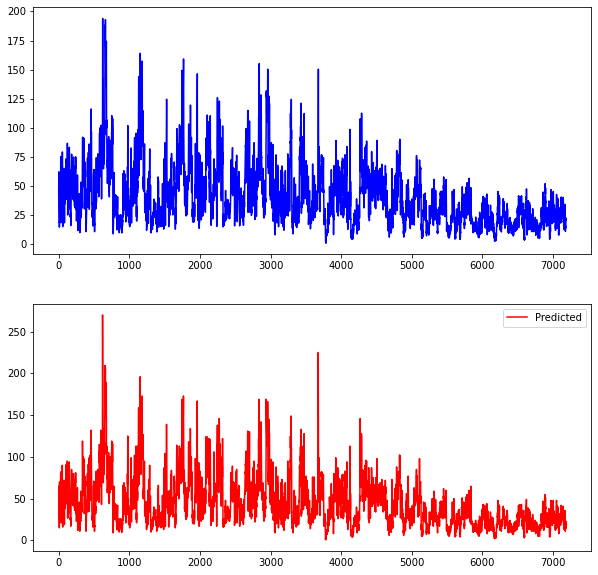

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.subplot(211)
plt.plot(y_hat_test, '#0000FF')

plt.subplot(212)
plt.plot(test_test, '#FF0000')
plt.legend(['Predicted','Actual'], loc='upper right',fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


## 참조 사이트: https://dsbook.tistory.com/22